# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 11152 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all)


  0% (    1 of 11152) |            | Elapsed Time: 0:00:25 ETA:  3 days, 8:15:01

  0% (   78 of 11152) |                    | Elapsed Time: 0:00:26 ETA:  0:01:59

  1% (  140 of 11152) |                    | Elapsed Time: 0:00:27 ETA:  0:01:54

  1% (  212 of 11152) |                    | Elapsed Time: 0:00:28 ETA:  0:01:58

  2% (  279 of 11152) |                    | Elapsed Time: 0:00:29 ETA:  0:01:56

  3% (  359 of 11152) |                    | Elapsed Time: 0:00:30 ETA:  0:01:54

  3% (  419 of 11152) |                    | Elapsed Time: 0:00:31 ETA:  0:01:53

  4% (  497 of 11152) |                    | Elapsed Time: 0:00:32 ETA:  0:01:51

  5% (  558 of 11152) |#                   | Elapsed Time: 0:00:33 ETA:  0:01:50

  5% (  631 of 11152) |#                   | Elapsed Time: 0:00:34 ETA:  0:01:51

  6% (  698 of 11152) |#                   | Elapsed Time: 0:00:34 ETA:  0:01:50

  6% (  771 of 11152) |#                   | Elapsed Time: 0:00:36 ETA:  0:01:50

  7% (  837 of 11152) |#                   | Elapsed Time: 0:00:36 ETA:  0:01:49

  8% (  913 of 11152) |#                   | Elapsed Time: 0:00:37 ETA:  0:01:48

  8% (  976 of 11152) |#                   | Elapsed Time: 0:00:38 ETA:  0:01:49

  9% ( 1051 of 11152) |#                   | Elapsed Time: 0:00:39 ETA:  0:01:48

 10% ( 1116 of 11152) |##                  | Elapsed Time: 0:00:40 ETA:  0:01:47

 10% ( 1187 of 11152) |##                  | Elapsed Time: 0:00:41 ETA:  0:01:48

 11% ( 1255 of 11152) |##                  | Elapsed Time: 0:00:42 ETA:  0:01:46

 11% ( 1330 of 11152) |##                  | Elapsed Time: 0:00:43 ETA:  0:01:45

 12% ( 1395 of 11152) |##                  | Elapsed Time: 0:00:44 ETA:  0:01:44

 13% ( 1472 of 11152) |##                  | Elapsed Time: 0:00:45 ETA:  0:01:43

 13% ( 1534 of 11152) |##                  | Elapsed Time: 0:00:46 ETA:  0:01:42

 14% ( 1609 of 11152) |##                  | Elapsed Time: 0:00:47 ETA:  0:01:41

 15% ( 1673 of 11152) |###                 | Elapsed Time: 0:00:48 ETA:  0:01:40

 15% ( 1752 of 11152) |###                 | Elapsed Time: 0:00:49 ETA:  0:01:39

 16% ( 1813 of 11152) |###                 | Elapsed Time: 0:00:49 ETA:  0:01:37

 16% ( 1892 of 11152) |###                 | Elapsed Time: 0:00:50 ETA:  0:01:36

 17% ( 1952 of 11152) |###                 | Elapsed Time: 0:00:51 ETA:  0:01:34

 17% ( 1995 of 11152) |###                 | Elapsed Time: 0:00:53 ETA:  0:01:49

 18% ( 2073 of 11152) |###                 | Elapsed Time: 0:00:54 ETA:  0:01:48

 18% ( 2092 of 11152) |###                 | Elapsed Time: 0:00:54 ETA:  0:01:48

 19% ( 2173 of 11152) |###                 | Elapsed Time: 0:00:55 ETA:  0:01:45

 20% ( 2231 of 11152) |####                | Elapsed Time: 0:00:56 ETA:  0:01:44

 20% ( 2300 of 11152) |####                | Elapsed Time: 0:00:57 ETA:  0:01:46

 21% ( 2370 of 11152) |####                | Elapsed Time: 0:00:58 ETA:  0:01:45

 21% ( 2447 of 11152) |####                | Elapsed Time: 0:00:59 ETA:  0:01:45

 22% ( 2510 of 11152) |####                | Elapsed Time: 0:00:59 ETA:  0:01:44

 23% ( 2590 of 11152) |####                | Elapsed Time: 0:01:00 ETA:  0:01:24

 23% ( 2649 of 11152) |####                | Elapsed Time: 0:01:01 ETA:  0:01:23

 24% ( 2732 of 11152) |####                | Elapsed Time: 0:01:02 ETA:  0:01:21

 25% ( 2789 of 11152) |#####               | Elapsed Time: 0:01:03 ETA:  0:01:20

 25% ( 2869 of 11152) |#####               | Elapsed Time: 0:01:04 ETA:  0:01:19

 26% ( 2928 of 11152) |#####               | Elapsed Time: 0:01:05 ETA:  0:01:16

 26% ( 3010 of 11152) |#####               | Elapsed Time: 0:01:06 ETA:  0:01:14

 27% ( 3067 of 11152) |#####               | Elapsed Time: 0:01:06 ETA:  0:01:13

 28% ( 3148 of 11152) |#####               | Elapsed Time: 0:01:07 ETA:  0:01:12

 28% ( 3207 of 11152) |#####               | Elapsed Time: 0:01:08 ETA:  0:01:11

 29% ( 3284 of 11152) |#####               | Elapsed Time: 0:01:09 ETA:  0:01:10

 30% ( 3346 of 11152) |######              | Elapsed Time: 0:01:10 ETA:  0:01:10

 30% ( 3428 of 11152) |######              | Elapsed Time: 0:01:11 ETA:  0:01:09

 31% ( 3486 of 11152) |######              | Elapsed Time: 0:01:12 ETA:  0:01:08

 31% ( 3566 of 11152) |######              | Elapsed Time: 0:01:13 ETA:  0:01:06

 32% ( 3625 of 11152) |######              | Elapsed Time: 0:01:13 ETA:  0:01:05

 33% ( 3709 of 11152) |######              | Elapsed Time: 0:01:14 ETA:  0:01:03

 33% ( 3764 of 11152) |######              | Elapsed Time: 0:01:15 ETA:  0:01:03

 34% ( 3845 of 11152) |######              | Elapsed Time: 0:01:16 ETA:  0:01:02

 35% ( 3904 of 11152) |#######             | Elapsed Time: 0:01:17 ETA:  0:01:00

 35% ( 3977 of 11152) |#######             | Elapsed Time: 0:01:18 ETA:  0:01:01

 36% ( 4043 of 11152) |#######             | Elapsed Time: 0:01:19 ETA:  0:01:01

 36% ( 4118 of 11152) |#######             | Elapsed Time: 0:01:20 ETA:  0:01:01

 37% ( 4183 of 11152) |#######             | Elapsed Time: 0:01:20 ETA:  0:01:01

 38% ( 4262 of 11152) |#######             | Elapsed Time: 0:01:21 ETA:  0:01:00

 38% ( 4322 of 11152) |#######             | Elapsed Time: 0:01:22 ETA:  0:01:02

 39% ( 4402 of 11152) |#######             | Elapsed Time: 0:01:23 ETA:  0:01:00

 40% ( 4461 of 11152) |########            | Elapsed Time: 0:01:24 ETA:  0:00:59

 40% ( 4543 of 11152) |########            | Elapsed Time: 0:01:25 ETA:  0:00:58

 41% ( 4601 of 11152) |########            | Elapsed Time: 0:01:26 ETA:  0:00:56

 41% ( 4679 of 11152) |########            | Elapsed Time: 0:01:27 ETA:  0:00:55

 42% ( 4740 of 11152) |########            | Elapsed Time: 0:01:27 ETA:  0:00:53

 43% ( 4822 of 11152) |########            | Elapsed Time: 0:01:28 ETA:  0:00:51

 43% ( 4880 of 11152) |########            | Elapsed Time: 0:01:29 ETA:  0:00:50

 44% ( 4957 of 11152) |########            | Elapsed Time: 0:01:30 ETA:  0:00:49

 45% ( 5019 of 11152) |#########           | Elapsed Time: 0:01:31 ETA:  0:00:47

 45% ( 5098 of 11152) |#########           | Elapsed Time: 0:01:32 ETA:  0:00:47

 46% ( 5158 of 11152) |#########           | Elapsed Time: 0:01:33 ETA:  0:00:47

 46% ( 5238 of 11152) |#########           | Elapsed Time: 0:01:34 ETA:  0:00:46

 47% ( 5273 of 11152) |#########           | Elapsed Time: 0:01:35 ETA:  0:01:06

 47% ( 5298 of 11152) |#########           | Elapsed Time: 0:01:36 ETA:  0:01:08

 48% ( 5376 of 11152) |#########           | Elapsed Time: 0:01:37 ETA:  0:01:08

 48% ( 5437 of 11152) |#########           | Elapsed Time: 0:01:38 ETA:  0:01:08

 49% ( 5517 of 11152) |#########           | Elapsed Time: 0:01:39 ETA:  0:01:07

 50% ( 5577 of 11152) |##########          | Elapsed Time: 0:01:39 ETA:  0:01:09

 50% ( 5657 of 11152) |##########          | Elapsed Time: 0:01:40 ETA:  0:01:07

 51% ( 5716 of 11152) |##########          | Elapsed Time: 0:01:41 ETA:  0:01:06

 51% ( 5796 of 11152) |##########          | Elapsed Time: 0:01:42 ETA:  0:01:05

 52% ( 5855 of 11152) |##########          | Elapsed Time: 0:01:43 ETA:  0:00:40

 53% ( 5931 of 11152) |##########          | Elapsed Time: 0:01:44 ETA:  0:00:39

 53% ( 5995 of 11152) |##########          | Elapsed Time: 0:01:45 ETA:  0:00:39

 54% ( 6073 of 11152) |##########          | Elapsed Time: 0:01:46 ETA:  0:00:37

 55% ( 6134 of 11152) |###########         | Elapsed Time: 0:01:47 ETA:  0:00:37

 55% ( 6212 of 11152) |###########         | Elapsed Time: 0:01:48 ETA:  0:00:35

 56% ( 6274 of 11152) |###########         | Elapsed Time: 0:01:48 ETA:  0:00:34

 57% ( 6361 of 11152) |###########         | Elapsed Time: 0:01:49 ETA:  0:00:32

 57% ( 6413 of 11152) |###########         | Elapsed Time: 0:01:50 ETA:  0:00:32

 58% ( 6495 of 11152) |###########         | Elapsed Time: 0:01:51 ETA:  0:00:30

 58% ( 6552 of 11152) |###########         | Elapsed Time: 0:01:52 ETA:  0:00:29

 59% ( 6630 of 11152) |###########         | Elapsed Time: 0:01:53 ETA:  0:00:28

 60% ( 6692 of 11152) |############        | Elapsed Time: 0:01:54 ETA:  0:00:27

 60% ( 6776 of 11152) |############        | Elapsed Time: 0:01:55 ETA:  0:00:24

 61% ( 6831 of 11152) |############        | Elapsed Time: 0:01:55 ETA:  0:00:23

 61% ( 6914 of 11152) |############        | Elapsed Time: 0:01:56 ETA:  0:00:21

 62% ( 6971 of 11152) |############        | Elapsed Time: 0:01:57 ETA:  0:00:22

 63% ( 7051 of 11152) |############        | Elapsed Time: 0:01:58 ETA:  0:00:21

 63% ( 7110 of 11152) |############        | Elapsed Time: 0:01:59 ETA:  0:00:21

 64% ( 7192 of 11152) |############        | Elapsed Time: 0:02:00 ETA:  0:00:19

 65% ( 7249 of 11152) |#############       | Elapsed Time: 0:02:01 ETA:  0:00:18

 65% ( 7328 of 11152) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:17

 66% ( 7389 of 11152) |#############       | Elapsed Time: 0:02:02 ETA:  0:00:16

 67% ( 7478 of 11152) |#############       | Elapsed Time: 0:02:03 ETA:  0:00:13

 67% ( 7528 of 11152) |#############       | Elapsed Time: 0:02:04 ETA:  0:00:11

 68% ( 7608 of 11152) |#############       | Elapsed Time: 0:02:05 ETA:  0:00:10

 68% ( 7668 of 11152) |#############       | Elapsed Time: 0:02:06 ETA:  0:00:09

 69% ( 7743 of 11152) |#############       | Elapsed Time: 0:02:07 ETA:  0:00:09

 70% ( 7807 of 11152) |##############      | Elapsed Time: 0:02:07 ETA:  0:00:08

 70% ( 7888 of 11152) |##############      | Elapsed Time: 0:02:08 ETA:  0:00:07

 71% ( 7946 of 11152) |##############      | Elapsed Time: 0:02:09 ETA:  0:00:06

 71% ( 8027 of 11152) |##############      | Elapsed Time: 0:02:10 ETA:  0:00:06

 72% ( 8086 of 11152) |##############      | Elapsed Time: 0:02:11 ETA:  0:00:08

 73% ( 8165 of 11152) |##############      | Elapsed Time: 0:02:12 ETA:  0:00:09

 73% ( 8225 of 11152) |##############      | Elapsed Time: 0:02:13 ETA:  0:00:09

 74% ( 8298 of 11152) |##############      | Elapsed Time: 0:02:14 ETA:  0:00:10

 75% ( 8365 of 11152) |###############     | Elapsed Time: 0:02:15 ETA:  0:00:08

 75% ( 8449 of 11152) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:06

 76% ( 8504 of 11152) |###############     | Elapsed Time: 0:02:16 ETA:  0:00:06

 77% ( 8597 of 11152) |###############     | Elapsed Time: 0:02:17 ETA:  0:00:02

 77% ( 8643 of 11152) |###############     | Elapsed Time: 0:02:18 ETA:  0:00:01

 78% ( 8720 of 11152) |###############     | Elapsed Time: 0:02:19 ETA:  0:00:00

 78% ( 8783 of 11152) |###############     | Elapsed Time: 0:02:20 ETA:  0:00:00

 79% ( 8868 of 11152) |###############     | Elapsed Time: 0:02:21 ETA:  0:00:00

 80% ( 8922 of 11152) |################    | Elapsed Time: 0:02:21 ETA:  0:00:00

 80% ( 8998 of 11152) |################    | Elapsed Time: 0:02:22 ETA:  0:00:00

 81% ( 9062 of 11152) |################    | Elapsed Time: 0:02:23 ETA:  0:00:00

 81% ( 9141 of 11152) |################    | Elapsed Time: 0:02:24 ETA:  0:00:00

 82% ( 9201 of 11152) |################    | Elapsed Time: 0:02:25 ETA:  0:00:00

 83% ( 9279 of 11152) |################    | Elapsed Time: 0:02:26 ETA:  0:00:00

 83% ( 9308 of 11152) |################    | Elapsed Time: 0:02:28 ETA:  0:00:17

 83% ( 9340 of 11152) |################    | Elapsed Time: 0:02:28 ETA:  0:00:19

 84% ( 9417 of 11152) |################    | Elapsed Time: 0:02:29 ETA:  0:00:20

 85% ( 9480 of 11152) |#################   | Elapsed Time: 0:02:30 ETA:  0:00:19

 85% ( 9557 of 11152) |#################   | Elapsed Time: 0:02:31 ETA:  0:00:18

 86% ( 9619 of 11152) |#################   | Elapsed Time: 0:02:32 ETA:  0:00:18

 86% ( 9699 of 11152) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:17

 87% ( 9759 of 11152) |#################   | Elapsed Time: 0:02:33 ETA:  0:00:15

 88% ( 9841 of 11152) |#################   | Elapsed Time: 0:02:34 ETA:  0:00:13

 88% ( 9898 of 11152) |#################   | Elapsed Time: 0:02:35 ETA:  0:00:00

 89% ( 9977 of 11152) |#################   | Elapsed Time: 0:02:36 ETA:  0:00:00

 90% (10037 of 11152) |##################  | Elapsed Time: 0:02:37 ETA:  0:00:00

 90% (10125 of 11152) |##################  | Elapsed Time: 0:02:38 ETA:  0:00:00

 91% (10177 of 11152) |##################  | Elapsed Time: 0:02:38 ETA:  0:00:00

 91% (10255 of 11152) |##################  | Elapsed Time: 0:02:39 ETA:  0:00:00

 92% (10316 of 11152) |##################  | Elapsed Time: 0:02:40 ETA:  0:00:00

 93% (10395 of 11152) |##################  | Elapsed Time: 0:02:41 ETA:  0:00:00

 93% (10456 of 11152) |##################  | Elapsed Time: 0:02:42 ETA:  0:00:00

 94% (10529 of 11152) |##################  | Elapsed Time: 0:02:43 ETA:  0:00:00

 95% (10595 of 11152) |################### | Elapsed Time: 0:02:44 ETA:  0:00:00

 95% (10673 of 11152) |################### | Elapsed Time: 0:02:45 ETA:  0:00:00

 96% (10734 of 11152) |################### | Elapsed Time: 0:02:46 ETA:  0:00:00

 96% (10813 of 11152) |################### | Elapsed Time: 0:02:47 ETA:  0:00:00

 97% (10874 of 11152) |################### | Elapsed Time: 0:02:48 ETA:  0:00:00

 98% (10953 of 11152) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 98% (11013 of 11152) |################### | Elapsed Time: 0:02:49 ETA:  0:00:00

 99% (11087 of 11152) |################### | Elapsed Time: 0:02:50 ETA:  0:00:00

100% (11152 of 11152) |####################| Elapsed Time: 0:02:51 Time: 0:02:51


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

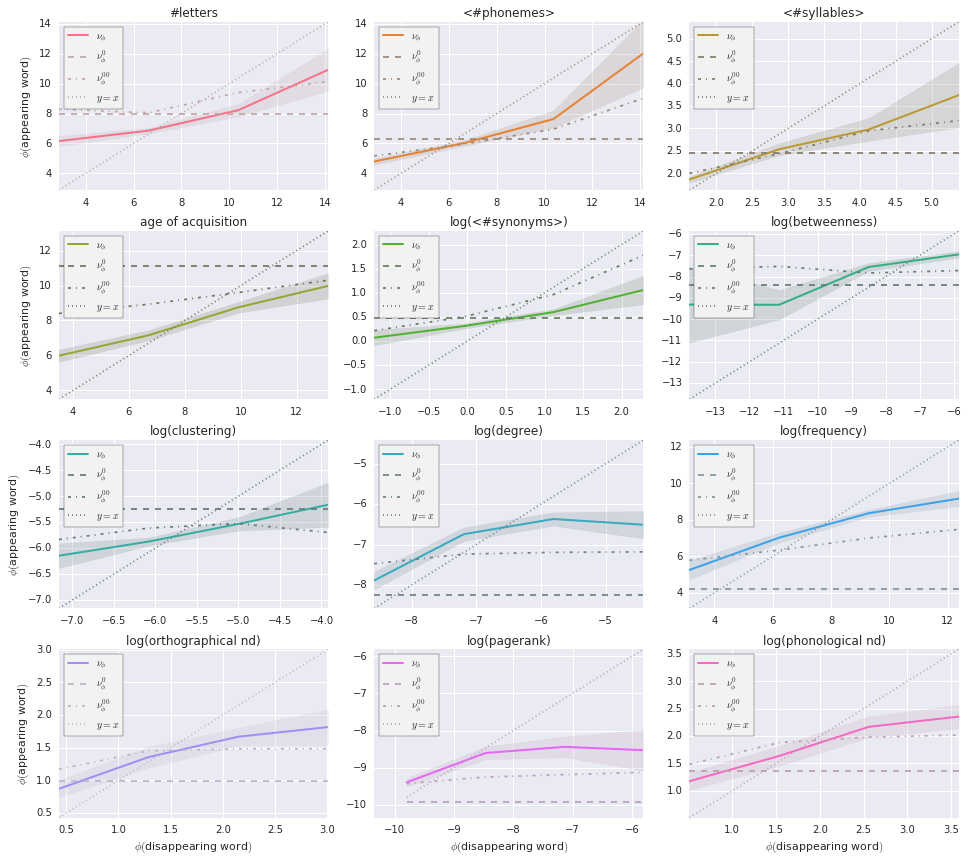

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

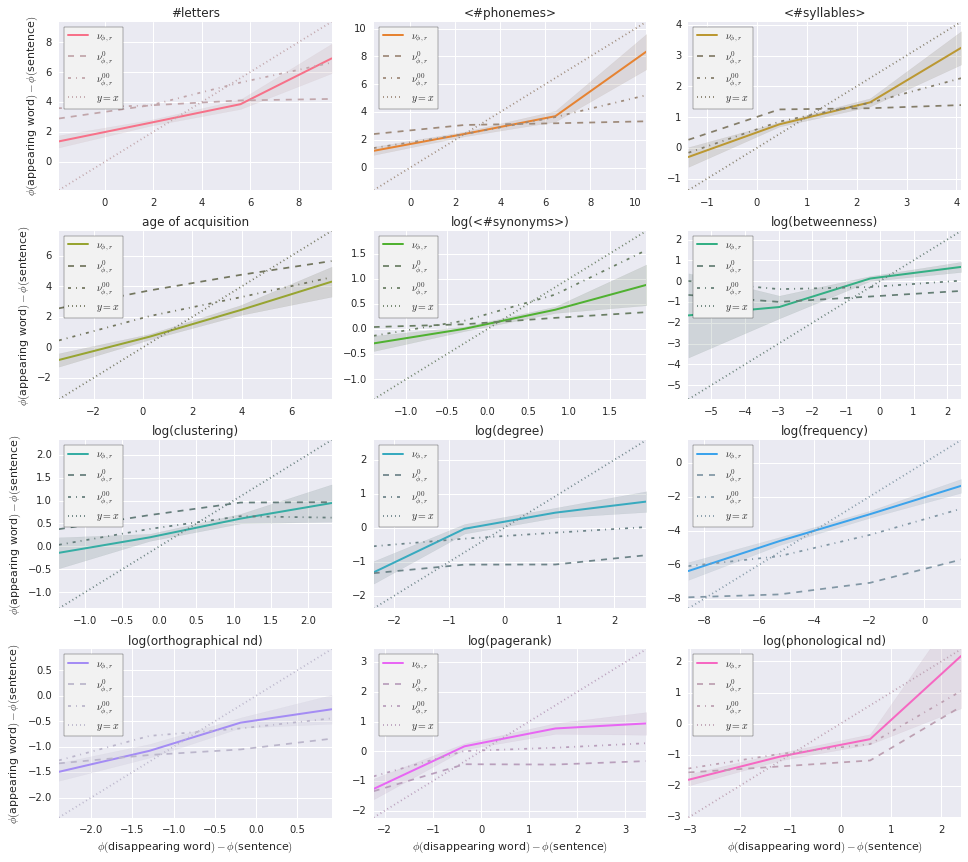

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

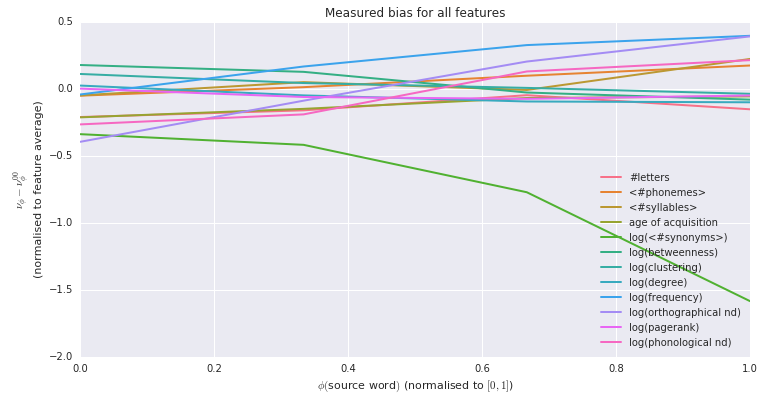

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

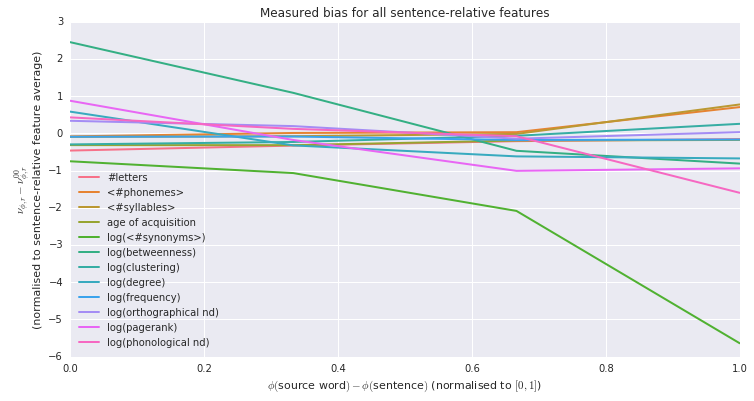

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

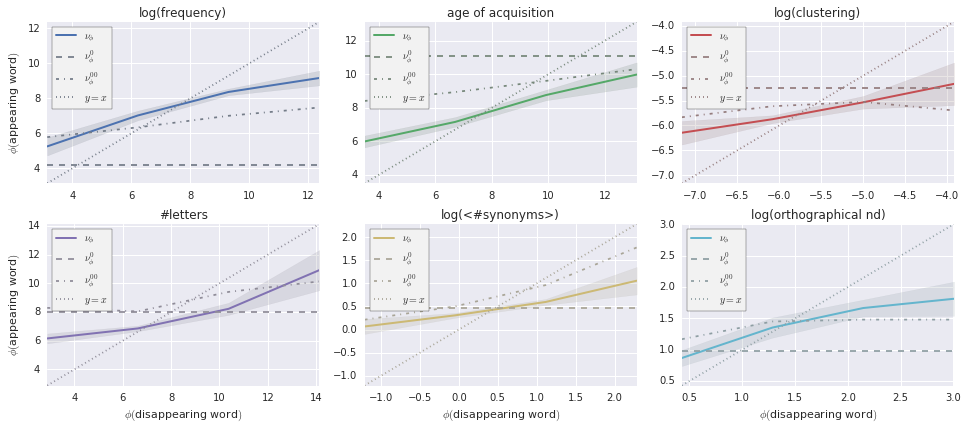

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

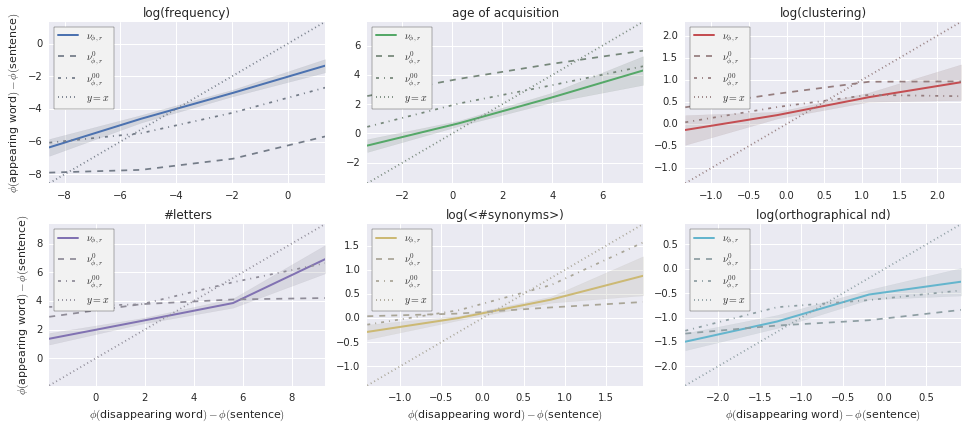

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

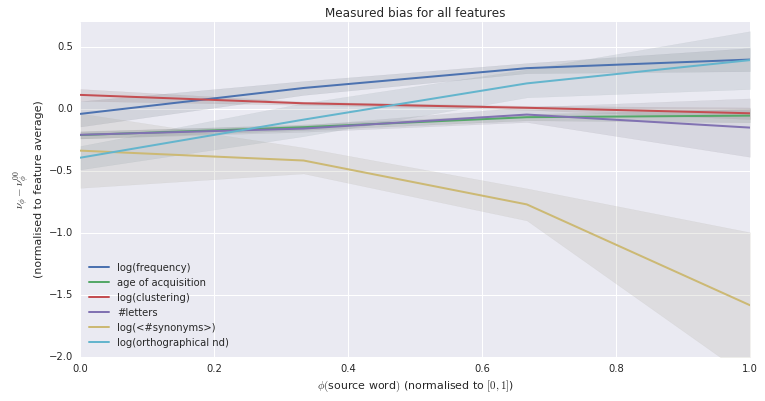

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

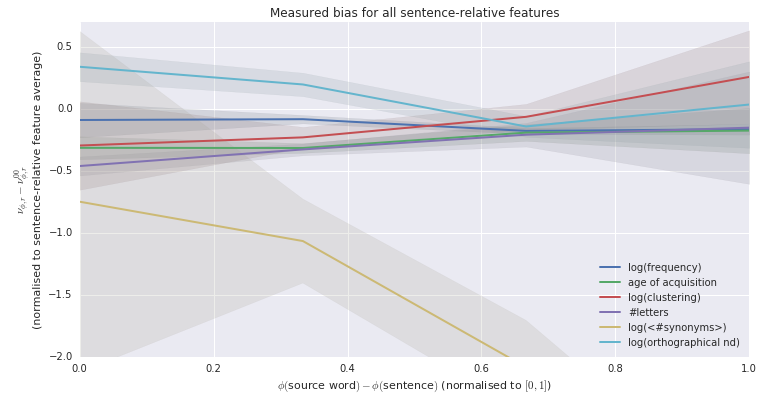

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


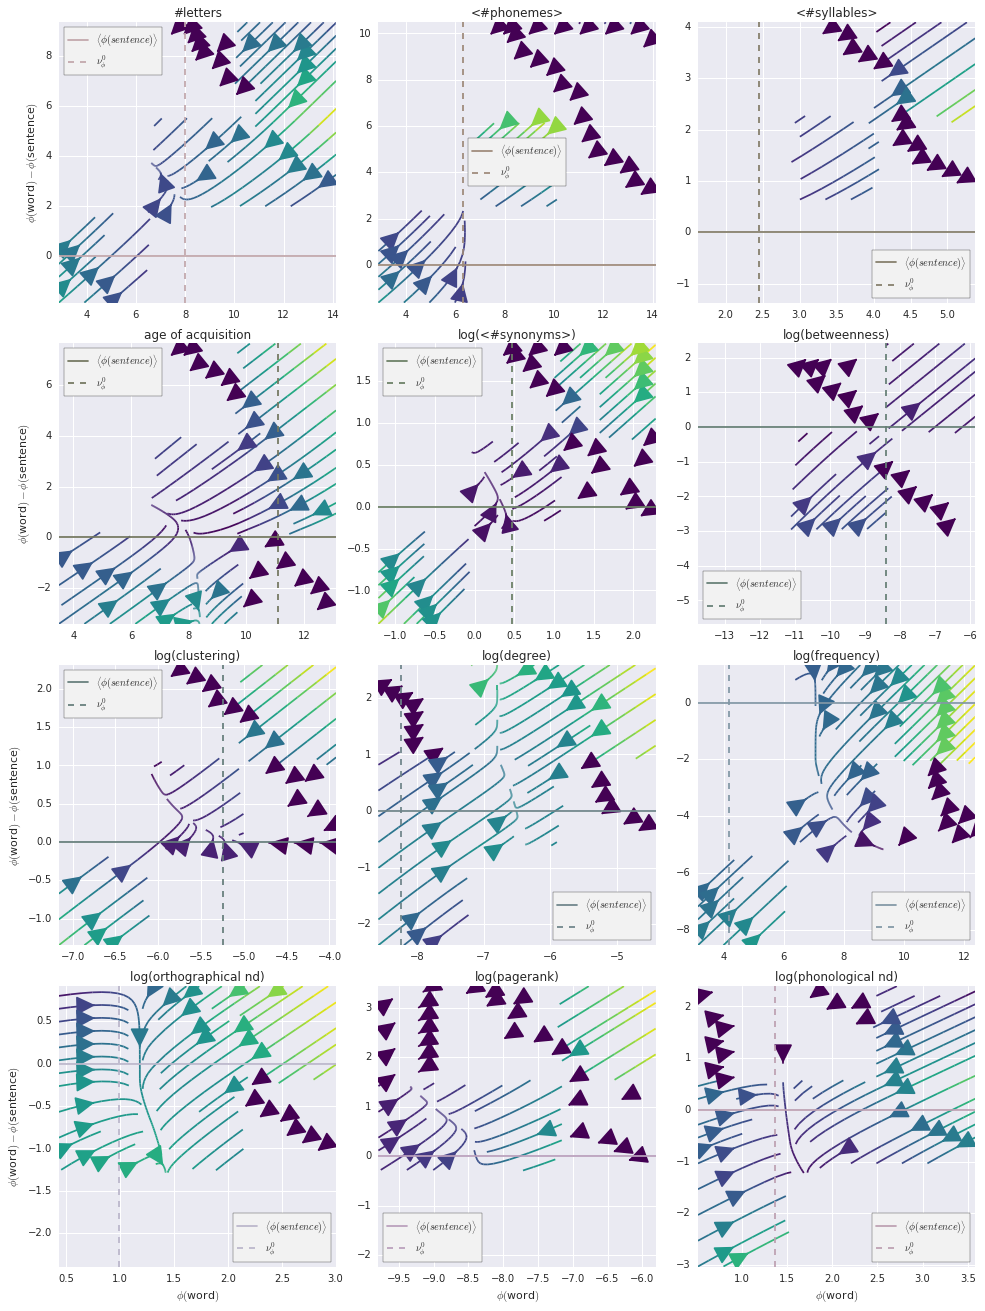

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


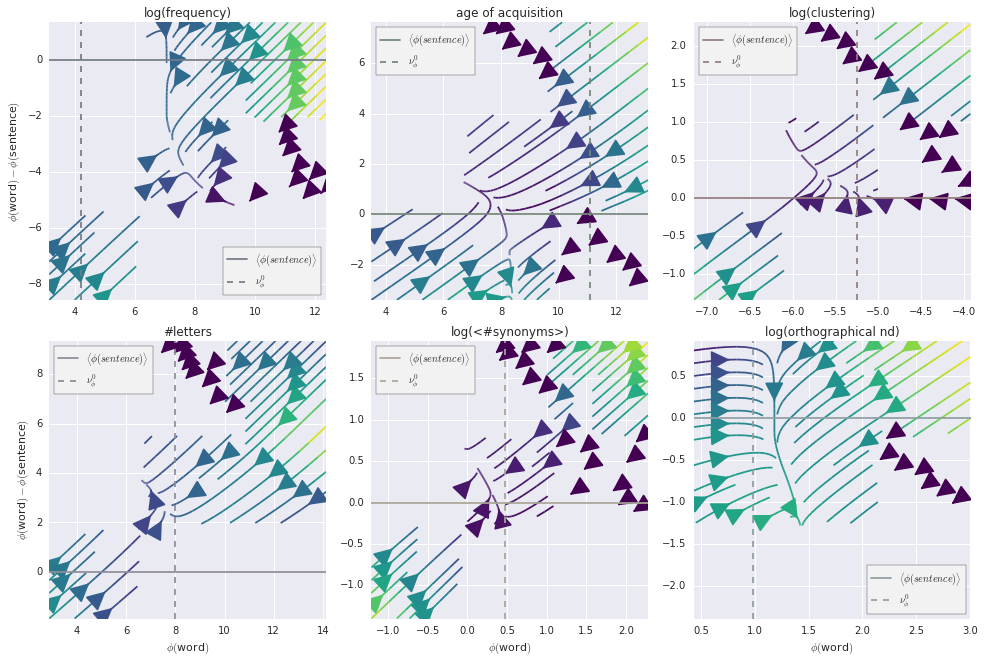

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.51785044  0.19868166  0.07871087  0.07040125  0.03125177  0.02942545
  0.02013668  0.01816313  0.01380503  0.01005046]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.531393,-0.261273,0.084022,-0.228353,-0.197145,0.426416,-0.214203,-0.258914,0.394981,-0.275894,0.156151,-0.005187
Component-1,0.374865,-0.362286,0.133359,-0.293268,-0.226326,-0.442860,0.185813,-0.277095,-0.429290,0.242441,-0.148322,0.026670
Component-2,0.323397,-0.120660,-0.051652,-0.025105,0.933299,-0.046756,-0.000935,-0.047329,-0.014770,0.026311,-0.002402,-0.034168


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 11152) |           | Elapsed Time: 0:00:44 ETA:  5 days, 17:04:25

  1% (  140 of 11152) |                    | Elapsed Time: 0:00:45 ETA:  0:00:41

  1% (  219 of 11152) |                    | Elapsed Time: 0:00:48 ETA:  0:02:42

  2% (  279 of 11152) |                    | Elapsed Time: 0:00:48 ETA:  0:02:14

  3% (  419 of 11152) |                    | Elapsed Time: 0:00:49 ETA:  0:01:42

  5% (  558 of 11152) |#                   | Elapsed Time: 0:00:51 ETA:  0:01:26

  6% (  698 of 11152) |#                   | Elapsed Time: 0:00:52 ETA:  0:01:26

  7% (  800 of 11152) |#                   | Elapsed Time: 0:00:53 ETA:  0:01:21

  7% (  837 of 11152) |#                   | Elapsed Time: 0:00:53 ETA:  0:00:40

  8% (  976 of 11152) |#                   | Elapsed Time: 0:00:54 ETA:  0:00:39

 10% ( 1116 of 11152) |##                  | Elapsed Time: 0:00:55 ETA:  0:00:36

 11% ( 1255 of 11152) |##                  | Elapsed Time: 0:00:56 ETA:  0:00:33

 12% ( 1395 of 11152) |##                  | Elapsed Time: 0:00:57 ETA:  0:00:30

 13% ( 1534 of 11152) |##                  | Elapsed Time: 0:00:58 ETA:  0:00:24

 15% ( 1673 of 11152) |###                 | Elapsed Time: 0:00:59 ETA:  0:00:23

 16% ( 1813 of 11152) |###                 | Elapsed Time: 0:01:00 ETA:  0:00:22

 17% ( 1952 of 11152) |###                 | Elapsed Time: 0:01:02 ETA:  0:00:21

 18% ( 2092 of 11152) |###                 | Elapsed Time: 0:01:03 ETA:  0:00:23

 20% ( 2231 of 11152) |####                | Elapsed Time: 0:01:04 ETA:  0:00:21

 21% ( 2370 of 11152) |####                | Elapsed Time: 0:01:05 ETA:  0:00:23

 22% ( 2510 of 11152) |####                | Elapsed Time: 0:01:06 ETA:  0:00:19

 23% ( 2618 of 11152) |####                | Elapsed Time: 0:01:07 ETA:  0:00:20

 23% ( 2649 of 11152) |####                | Elapsed Time: 0:01:07 ETA:  0:00:21

 25% ( 2789 of 11152) |#####               | Elapsed Time: 0:01:08 ETA:  0:00:17

 26% ( 2928 of 11152) |#####               | Elapsed Time: 0:01:09 ETA:  0:00:14

 27% ( 3067 of 11152) |#####               | Elapsed Time: 0:01:10 ETA:  0:00:13

 28% ( 3207 of 11152) |#####               | Elapsed Time: 0:01:11 ETA:  0:00:11

 30% ( 3346 of 11152) |######              | Elapsed Time: 0:01:12 ETA:  0:00:10

 31% ( 3486 of 11152) |######              | Elapsed Time: 0:01:13 ETA:  0:00:05

 32% ( 3625 of 11152) |######              | Elapsed Time: 0:01:14 ETA:  0:00:06

 33% ( 3764 of 11152) |######              | Elapsed Time: 0:01:15 ETA:  0:00:04

 35% ( 3904 of 11152) |#######             | Elapsed Time: 0:01:16 ETA:  0:00:04

 35% ( 3993 of 11152) |#######             | Elapsed Time: 0:01:17 ETA:  0:00:07

 36% ( 4043 of 11152) |#######             | Elapsed Time: 0:01:18 ETA:  0:00:08

 37% ( 4183 of 11152) |#######             | Elapsed Time: 0:01:19 ETA:  0:00:10

 38% ( 4286 of 11152) |#######             | Elapsed Time: 0:01:20 ETA:  0:00:12

 38% ( 4322 of 11152) |#######             | Elapsed Time: 0:01:20 ETA:  0:00:16

 40% ( 4461 of 11152) |########            | Elapsed Time: 0:01:21 ETA:  0:00:15

 41% ( 4576 of 11152) |########            | Elapsed Time: 0:01:22 ETA:  0:00:17

 41% ( 4601 of 11152) |########            | Elapsed Time: 0:01:22 ETA:  0:00:16

 42% ( 4725 of 11152) |########            | Elapsed Time: 0:01:23 ETA:  0:00:10

 42% ( 4740 of 11152) |########            | Elapsed Time: 0:01:24 ETA:  0:00:12

 43% ( 4843 of 11152) |########            | Elapsed Time: 0:01:25 ETA:  0:00:13

 43% ( 4880 of 11152) |########            | Elapsed Time: 0:01:25 ETA:  0:00:13

 44% ( 4992 of 11152) |########            | Elapsed Time: 0:01:26 ETA:  0:00:10

 45% ( 5019 of 11152) |#########           | Elapsed Time: 0:01:26 ETA:  0:00:09

 46% ( 5158 of 11152) |#########           | Elapsed Time: 0:01:27 ETA:  0:00:10

 47% ( 5261 of 11152) |#########           | Elapsed Time: 0:01:28 ETA:  0:00:11

 47% ( 5298 of 11152) |#########           | Elapsed Time: 0:01:29 ETA:  0:00:12

 48% ( 5437 of 11152) |#########           | Elapsed Time: 0:01:30 ETA:  0:00:07

 49% ( 5548 of 11152) |#########           | Elapsed Time: 0:01:31 ETA:  0:00:07

 50% ( 5577 of 11152) |##########          | Elapsed Time: 0:01:31 ETA:  0:00:12

 50% ( 5685 of 11152) |##########          | Elapsed Time: 0:01:32 ETA:  0:00:11

 51% ( 5716 of 11152) |##########          | Elapsed Time: 0:01:33 ETA:  0:00:11

 52% ( 5819 of 11152) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:12

 52% ( 5855 of 11152) |##########          | Elapsed Time: 0:01:34 ETA:  0:00:10

 53% ( 5995 of 11152) |##########          | Elapsed Time: 0:01:35 ETA:  0:00:09

 54% ( 6089 of 11152) |##########          | Elapsed Time: 0:01:36 ETA:  0:00:11

 55% ( 6134 of 11152) |###########         | Elapsed Time: 0:01:36 ETA:  0:00:11

 55% ( 6226 of 11152) |###########         | Elapsed Time: 0:01:37 ETA:  0:00:07

 56% ( 6274 of 11152) |###########         | Elapsed Time: 0:01:38 ETA:  0:00:06

 57% ( 6413 of 11152) |###########         | Elapsed Time: 0:01:39 ETA:  0:00:02

 58% ( 6501 of 11152) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:05

 58% ( 6552 of 11152) |###########         | Elapsed Time: 0:01:40 ETA:  0:00:06

 59% ( 6655 of 11152) |###########         | Elapsed Time: 0:01:41 ETA:  0:00:06

 60% ( 6692 of 11152) |############        | Elapsed Time: 0:01:42 ETA:  0:00:05

 60% ( 6787 of 11152) |############        | Elapsed Time: 0:01:43 ETA:  0:00:06

 61% ( 6831 of 11152) |############        | Elapsed Time: 0:01:43 ETA:  0:00:05

 62% ( 6918 of 11152) |############        | Elapsed Time: 0:01:44 ETA:  0:00:07

 62% ( 6971 of 11152) |############        | Elapsed Time: 0:01:45 ETA:  0:00:14

 63% ( 7075 of 11152) |############        | Elapsed Time: 0:01:46 ETA:  0:00:11

 63% ( 7110 of 11152) |############        | Elapsed Time: 0:01:46 ETA:  0:00:09

 64% ( 7224 of 11152) |############        | Elapsed Time: 0:01:47 ETA:  0:00:06

 65% ( 7249 of 11152) |#############       | Elapsed Time: 0:01:48 ETA:  0:00:06

 65% ( 7358 of 11152) |#############       | Elapsed Time: 0:01:49 ETA:  0:00:02

 66% ( 7389 of 11152) |#############       | Elapsed Time: 0:01:49 ETA:  0:00:01

 67% ( 7528 of 11152) |#############       | Elapsed Time: 0:01:50 ETA:  0:00:00

 68% ( 7634 of 11152) |#############       | Elapsed Time: 0:01:51 ETA:  0:00:00

 68% ( 7668 of 11152) |#############       | Elapsed Time: 0:01:51 ETA:  0:00:00

 69% ( 7756 of 11152) |#############       | Elapsed Time: 0:01:52 ETA:  0:00:00

 70% ( 7807 of 11152) |##############      | Elapsed Time: 0:01:53 ETA:  0:00:00

 70% ( 7915 of 11152) |##############      | Elapsed Time: 0:01:54 ETA:  0:00:00

 71% ( 7946 of 11152) |##############      | Elapsed Time: 0:01:54 ETA:  0:00:00

 72% ( 8043 of 11152) |##############      | Elapsed Time: 0:01:55 ETA:  0:00:00

 72% ( 8086 of 11152) |##############      | Elapsed Time: 0:01:56 ETA:  0:00:00

 73% ( 8201 of 11152) |##############      | Elapsed Time: 0:01:57 ETA:  0:00:00

 73% ( 8225 of 11152) |##############      | Elapsed Time: 0:01:57 ETA:  0:00:00

 74% ( 8304 of 11152) |##############      | Elapsed Time: 0:01:58 ETA:  0:00:00

 75% ( 8365 of 11152) |###############     | Elapsed Time: 0:01:58 ETA:  0:00:00

 76% ( 8504 of 11152) |###############     | Elapsed Time: 0:02:00 ETA:  0:00:00

 77% ( 8643 of 11152) |###############     | Elapsed Time: 0:02:00 ETA:  0:00:00

 78% ( 8750 of 11152) |###############     | Elapsed Time: 0:02:01 ETA:  0:00:00

 78% ( 8783 of 11152) |###############     | Elapsed Time: 0:02:02 ETA:  0:00:00

 79% ( 8889 of 11152) |###############     | Elapsed Time: 0:02:03 ETA:  0:00:00

 80% ( 8922 of 11152) |################    | Elapsed Time: 0:02:03 ETA:  0:00:00

 80% ( 9015 of 11152) |################    | Elapsed Time: 0:02:04 ETA:  0:00:00

 81% ( 9062 of 11152) |################    | Elapsed Time: 0:02:05 ETA:  0:00:00

 82% ( 9146 of 11152) |################    | Elapsed Time: 0:02:06 ETA:  0:00:00

 82% ( 9201 of 11152) |################    | Elapsed Time: 0:02:06 ETA:  0:00:00

 83% ( 9301 of 11152) |################    | Elapsed Time: 0:02:07 ETA:  0:00:00

 83% ( 9340 of 11152) |################    | Elapsed Time: 0:02:07 ETA:  0:00:00

 85% ( 9480 of 11152) |#################   | Elapsed Time: 0:02:09 ETA:  0:00:00

 86% ( 9597 of 11152) |#################   | Elapsed Time: 0:02:10 ETA:  0:00:00

 86% ( 9619 of 11152) |#################   | Elapsed Time: 0:02:10 ETA:  0:00:00

 87% ( 9735 of 11152) |#################   | Elapsed Time: 0:02:11 ETA:  0:00:00

 87% ( 9759 of 11152) |#################   | Elapsed Time: 0:02:11 ETA:  0:00:00

 88% ( 9898 of 11152) |#################   | Elapsed Time: 0:02:12 ETA:  0:00:00

 89% ( 9995 of 11152) |#################   | Elapsed Time: 0:02:13 ETA:  0:00:00

 90% (10037 of 11152) |##################  | Elapsed Time: 0:02:14 ETA:  0:00:00

 91% (10177 of 11152) |##################  | Elapsed Time: 0:02:15 ETA:  0:00:00

 92% (10316 of 11152) |##################  | Elapsed Time: 0:02:16 ETA:  0:00:00

 93% (10422 of 11152) |##################  | Elapsed Time: 0:02:17 ETA:  0:00:00

 93% (10456 of 11152) |##################  | Elapsed Time: 0:02:17 ETA:  0:00:00

 95% (10595 of 11152) |################### | Elapsed Time: 0:02:18 ETA:  0:00:00

 96% (10734 of 11152) |################### | Elapsed Time: 0:02:20 ETA:  0:00:00

 97% (10874 of 11152) |################### | Elapsed Time: 0:02:21 ETA:  0:00:00

 98% (11013 of 11152) |################### | Elapsed Time: 0:02:22 ETA:  0:00:00

100% (11152 of 11152) |####################| Elapsed Time: 0:02:23 Time: 0:02:23


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

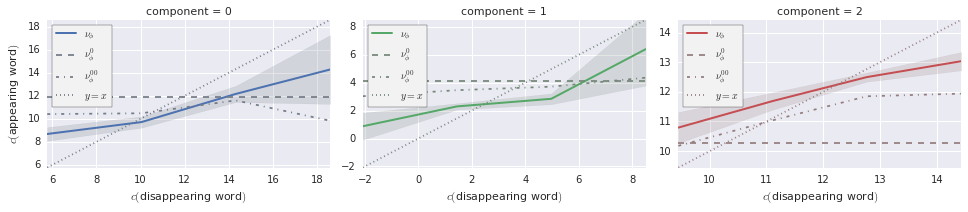

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.55814635  0.19780771  0.14682365]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,0.752078,0.102737,-0.296483,0.517980,-0.259801,-0.011056
Component-1,0.421227,0.148210,-0.418700,-0.737716,0.284406,0.013432
Component-2,0.489395,-0.054783,0.844981,-0.195298,0.043877,-0.058579


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 11152) |            | Elapsed Time: 0:00:12 ETA:  1 day, 15:21:44

  0% (   92 of 11152) |                    | Elapsed Time: 0:00:13 ETA:  0:01:49

  1% (  140 of 11152) |                    | Elapsed Time: 0:00:14 ETA:  0:01:37

  2% (  250 of 11152) |                    | Elapsed Time: 0:00:15 ETA:  0:01:32

  2% (  279 of 11152) |                    | Elapsed Time: 0:00:15 ETA:  0:01:31

  3% (  390 of 11152) |                    | Elapsed Time: 0:00:16 ETA:  0:01:28

  3% (  419 of 11152) |                    | Elapsed Time: 0:00:16 ETA:  0:01:28

  4% (  522 of 11152) |                    | Elapsed Time: 0:00:17 ETA:  0:01:28

  5% (  558 of 11152) |#                   | Elapsed Time: 0:00:17 ETA:  0:01:27

  6% (  698 of 11152) |#                   | Elapsed Time: 0:00:19 ETA:  0:01:21

  7% (  805 of 11152) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:21

  7% (  837 of 11152) |#                   | Elapsed Time: 0:00:20 ETA:  0:01:20

  8% (  976 of 11152) |#                   | Elapsed Time: 0:00:21 ETA:  0:01:17

 10% ( 1116 of 11152) |##                  | Elapsed Time: 0:00:22 ETA:  0:01:12

 11% ( 1255 of 11152) |##                  | Elapsed Time: 0:00:23 ETA:  0:01:08

 12% ( 1395 of 11152) |##                  | Elapsed Time: 0:00:24 ETA:  0:01:04

 13% ( 1534 of 11152) |##                  | Elapsed Time: 0:00:25 ETA:  0:01:01

 15% ( 1673 of 11152) |###                 | Elapsed Time: 0:00:26 ETA:  0:00:58

 16% ( 1813 of 11152) |###                 | Elapsed Time: 0:00:28 ETA:  0:00:56

 17% ( 1952 of 11152) |###                 | Elapsed Time: 0:00:29 ETA:  0:00:55

 18% ( 2092 of 11152) |###                 | Elapsed Time: 0:00:30 ETA:  0:00:56

 20% ( 2231 of 11152) |####                | Elapsed Time: 0:00:31 ETA:  0:00:58

 20% ( 2335 of 11152) |####                | Elapsed Time: 0:00:32 ETA:  0:01:00

 21% ( 2370 of 11152) |####                | Elapsed Time: 0:00:32 ETA:  0:01:00

 22% ( 2510 of 11152) |####                | Elapsed Time: 0:00:33 ETA:  0:00:57

 23% ( 2620 of 11152) |####                | Elapsed Time: 0:00:34 ETA:  0:00:58

 23% ( 2649 of 11152) |####                | Elapsed Time: 0:00:35 ETA:  0:00:58

 25% ( 2789 of 11152) |#####               | Elapsed Time: 0:00:36 ETA:  0:00:57

 26% ( 2928 of 11152) |#####               | Elapsed Time: 0:00:37 ETA:  0:00:53

 27% ( 3067 of 11152) |#####               | Elapsed Time: 0:00:38 ETA:  0:00:54

 28% ( 3207 of 11152) |#####               | Elapsed Time: 0:00:39 ETA:  0:00:51

 30% ( 3346 of 11152) |######              | Elapsed Time: 0:00:40 ETA:  0:00:45

 31% ( 3486 of 11152) |######              | Elapsed Time: 0:00:41 ETA:  0:00:44

 32% ( 3625 of 11152) |######              | Elapsed Time: 0:00:42 ETA:  0:00:42

 33% ( 3764 of 11152) |######              | Elapsed Time: 0:00:43 ETA:  0:00:40

 35% ( 3904 of 11152) |#######             | Elapsed Time: 0:00:44 ETA:  0:00:37

 35% ( 3983 of 11152) |#######             | Elapsed Time: 0:00:45 ETA:  0:00:42

 36% ( 4043 of 11152) |#######             | Elapsed Time: 0:00:46 ETA:  0:00:46

 37% ( 4143 of 11152) |#######             | Elapsed Time: 0:00:47 ETA:  0:00:49

 37% ( 4183 of 11152) |#######             | Elapsed Time: 0:00:47 ETA:  0:00:48

 38% ( 4277 of 11152) |#######             | Elapsed Time: 0:00:48 ETA:  0:00:52

 38% ( 4322 of 11152) |#######             | Elapsed Time: 0:00:48 ETA:  0:00:53

 40% ( 4461 of 11152) |########            | Elapsed Time: 0:00:50 ETA:  0:00:57

 41% ( 4601 of 11152) |########            | Elapsed Time: 0:00:51 ETA:  0:00:47

 42% ( 4740 of 11152) |########            | Elapsed Time: 0:00:52 ETA:  0:00:41

 43% ( 4837 of 11152) |########            | Elapsed Time: 0:00:53 ETA:  0:00:43

 43% ( 4880 of 11152) |########            | Elapsed Time: 0:00:53 ETA:  0:00:40

 44% ( 4993 of 11152) |########            | Elapsed Time: 0:00:54 ETA:  0:00:39

 45% ( 5019 of 11152) |#########           | Elapsed Time: 0:00:54 ETA:  0:00:42

 46% ( 5158 of 11152) |#########           | Elapsed Time: 0:00:56 ETA:  0:00:42

 47% ( 5270 of 11152) |#########           | Elapsed Time: 0:00:57 ETA:  0:00:41

 47% ( 5298 of 11152) |#########           | Elapsed Time: 0:00:57 ETA:  0:00:45

 48% ( 5437 of 11152) |#########           | Elapsed Time: 0:00:58 ETA:  0:00:38

 49% ( 5549 of 11152) |#########           | Elapsed Time: 0:00:59 ETA:  0:00:37

 50% ( 5577 of 11152) |##########          | Elapsed Time: 0:00:59 ETA:  0:00:41

 50% ( 5670 of 11152) |##########          | Elapsed Time: 0:01:00 ETA:  0:00:43

 51% ( 5716 of 11152) |##########          | Elapsed Time: 0:01:01 ETA:  0:00:43

 52% ( 5816 of 11152) |##########          | Elapsed Time: 0:01:02 ETA:  0:00:44

 52% ( 5855 of 11152) |##########          | Elapsed Time: 0:01:02 ETA:  0:00:44

 53% ( 5995 of 11152) |##########          | Elapsed Time: 0:01:03 ETA:  0:00:44

 54% ( 6107 of 11152) |##########          | Elapsed Time: 0:01:04 ETA:  0:00:42

 55% ( 6134 of 11152) |###########         | Elapsed Time: 0:01:05 ETA:  0:00:43

 56% ( 6274 of 11152) |###########         | Elapsed Time: 0:01:06 ETA:  0:00:31

 57% ( 6413 of 11152) |###########         | Elapsed Time: 0:01:07 ETA:  0:00:26

 58% ( 6552 of 11152) |###########         | Elapsed Time: 0:01:08 ETA:  0:00:22

 60% ( 6692 of 11152) |############        | Elapsed Time: 0:01:09 ETA:  0:00:21

 60% ( 6793 of 11152) |############        | Elapsed Time: 0:01:10 ETA:  0:00:22

 61% ( 6831 of 11152) |############        | Elapsed Time: 0:01:10 ETA:  0:00:22

 62% ( 6971 of 11152) |############        | Elapsed Time: 0:01:11 ETA:  0:00:18

 63% ( 7110 of 11152) |############        | Elapsed Time: 0:01:12 ETA:  0:00:16

 65% ( 7249 of 11152) |#############       | Elapsed Time: 0:01:13 ETA:  0:00:14

 66% ( 7389 of 11152) |#############       | Elapsed Time: 0:01:14 ETA:  0:00:10

 67% ( 7528 of 11152) |#############       | Elapsed Time: 0:01:15 ETA:  0:00:07

 68% ( 7668 of 11152) |#############       | Elapsed Time: 0:01:16 ETA:  0:00:04

 70% ( 7807 of 11152) |##############      | Elapsed Time: 0:01:17 ETA:  0:00:00

 71% ( 7946 of 11152) |##############      | Elapsed Time: 0:01:18 ETA:  0:00:00

 72% ( 8038 of 11152) |##############      | Elapsed Time: 0:01:19 ETA:  0:00:02

 72% ( 8086 of 11152) |##############      | Elapsed Time: 0:01:20 ETA:  0:00:03

 73% ( 8225 of 11152) |##############      | Elapsed Time: 0:01:21 ETA:  0:00:04

 75% ( 8365 of 11152) |###############     | Elapsed Time: 0:01:22 ETA:  0:00:06

 76% ( 8504 of 11152) |###############     | Elapsed Time: 0:01:23 ETA:  0:00:01

 77% ( 8643 of 11152) |###############     | Elapsed Time: 0:01:23 ETA:  0:00:00

 78% ( 8783 of 11152) |###############     | Elapsed Time: 0:01:24 ETA:  0:00:00

 80% ( 8922 of 11152) |################    | Elapsed Time: 0:01:25 ETA:  0:00:00

 81% ( 9062 of 11152) |################    | Elapsed Time: 0:01:27 ETA:  0:00:00

 82% ( 9201 of 11152) |################    | Elapsed Time: 0:01:28 ETA:  0:00:00

 83% ( 9340 of 11152) |################    | Elapsed Time: 0:01:29 ETA:  0:00:00

 85% ( 9480 of 11152) |#################   | Elapsed Time: 0:01:30 ETA:  0:00:00

 86% ( 9619 of 11152) |#################   | Elapsed Time: 0:01:31 ETA:  0:00:00

 87% ( 9759 of 11152) |#################   | Elapsed Time: 0:01:32 ETA:  0:00:00

 88% ( 9898 of 11152) |#################   | Elapsed Time: 0:01:33 ETA:  0:00:00

 90% (10037 of 11152) |##################  | Elapsed Time: 0:01:34 ETA:  0:00:00

 91% (10177 of 11152) |##################  | Elapsed Time: 0:01:34 ETA:  0:00:00

 92% (10316 of 11152) |##################  | Elapsed Time: 0:01:35 ETA:  0:00:00

 93% (10456 of 11152) |##################  | Elapsed Time: 0:01:36 ETA:  0:00:00

 95% (10595 of 11152) |################### | Elapsed Time: 0:01:37 ETA:  0:00:00

 96% (10734 of 11152) |################### | Elapsed Time: 0:01:38 ETA:  0:00:00

 97% (10874 of 11152) |################### | Elapsed Time: 0:01:39 ETA:  0:00:00

 98% (11013 of 11152) |################### | Elapsed Time: 0:01:40 ETA:  0:00:00

100% (11152 of 11152) |####################| Elapsed Time: 0:01:41 Time: 0:01:41


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

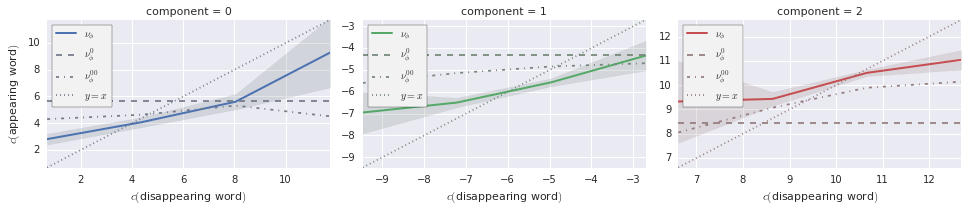

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1343 (cluster-unique) substitutions, but the PCA is in fact computed on 420 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.